In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import Entrez
Entrez.email = "lukas.becker@hhu.de"

# Scripts for daily routines (e.g. splitting FASTA files, concatenating files ...)

In [1]:
fasta_file = '../data/curvibacter_sequences/curvibacter_aep_eps_operon.faa'

In [8]:
def split_fasta_file_into_multiple_files(filename,destination):
    try:
        i = open(filename,'r')
        lines = i.readlines()
        i.close()
        
        o = None
        for line in lines:
            if ">" in line:
                if o != None:
                    o.close()
                o = open(destination + '/' + ''.join(line.split('>')[1]).split(' ')[0]+'.faa','w')
            o.write(line)
        
        o.close()
    except Exception as e:
        print("Exception occured : {}".format(e))
        raise Exception('couldnt transform fasta file into multiple files')

In [9]:
split_fasta_file_into_multiple_files(fasta_file,'../data/curvibacter_sequences/eps_operon')

## regular expressions

In [1]:
import re

In [2]:
regex = re.compile('([A,C,G,T]{10,20}TTT[A,C,G])')

In [3]:
genome1_file = open('../data/motif_finding/GCF_000005845.2_ASM584v2_cds_from_genomic.faa','r')
lines1 = genome1_file.readlines()
genome1_file.close()

In [4]:
genome2_file = open('../data/motif_finding/GCF_000009725.1_ASM972v1_cds_from_genomic.faa','r')
lines2 = genome2_file.readlines()
genome2_file.close()

In [11]:
genome1_dict = {}
for line in lines1:
    if '>' in line:
        key = line.split(' ')[0].split('cds_')[-1]
        genome1_dict[key] = ''
    else:
        line = line.strip()
        genome1_dict[key] += line

In [14]:
genome2_dict = {}
for line in lines2:
    if '>' in line:
        key = line.split(' ')[0].split('cds_')[-1]
        genome2_dict[key] = ''
    else:
        line = line.strip()
        genome2_dict[key] += line

In [16]:
result_dict_genome1 = {}
for key in genome1_dict.keys():
    result_dict_genome1[key] = re.findall(regex, genome1_dict[key])

In [17]:
result_dict_genome2 = {}
for key in genome2_dict.keys():
    result_dict_genome2[key] = re.findall(regex, genome2_dict[key])

In [18]:
for key in result_dict_genome1.keys():
    for result in result_dict_genome1[key]:
        for key2 in result_dict_genome2.keys():
            if str(result) in result_dict_genome2[key2]:
                print(key,key2)

NP_415105.1_562 WP_010873414.1_2279


In [20]:
result_dict_genome2['WP_010873414.1_2279']

['ATGATTAAGCAATTTTTC',
 'CCGTTATTGGCTTTA',
 'ATCTAACGCCAACGGTGGGTTTTG',
 'TCAGCGGGAGATAAACAATCTTTG',
 'ATCGACCATAGCTTGAGCTATTTA',
 'TAACCCGTTCCCTCCAGCGATTTA',
 'AGACCGCTGTTGCCAGGGAATTTC',
 'GATGGCAAGGGCACAGTCCATTTC',
 'ACTGGTTATTTTGAACCAGTTTA',
 'TGCCGAATATCGTTATCCCATTTA',
 'TGGTTTGCCCAATAATTTTTC',
 'GACTTGGAAGGTATGGATGGTTTA',
 'GAGGCCAAAGTTCCGTGGCCTTTG',
 'ACGGATTATCCCTACGTAAGTTTA',
 'GAAACCATCCAAGAGGGAATTTTC',
 'CAGCCTGGGGAGGTTACTTTG',
 'CCTAAGTTAATCGACTATTTTG',
 'ATCCCAGCGAACTAAGTCGTTTTA',
 'CCCCGCAATAATCGTCTAATTTTC',
 'CCTCCAGGGGCGATCGCCGTTTTA',
 'AAAAAGTCAACGTTAGTCGTTTTG',
 'GGCCCCGGTCGGGTGGATATTTTC',
 'ACTCCTGGCGATCGAGCCGGTTTG',
 'ATGAGTGACGACGGCCAAATTTA']

In [21]:
for i in result_dict_genome1['NP_415105.1_562']:
    if i in result_dict_genome2['WP_010873414.1_2279']:
        print(i)

CCGTTATTGGCTTTA


In [1]:
import subprocess

In [4]:
process = subprocess.Popen(['blastp','-h'])
stdout = process.communicate()[0]

USAGE
  blastp [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-ipglist filename]
    [-negative_ipglist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-seg SEG_options]
    [-soft_masking soft_masking] [-matrix matrix_name]
    [-threshold float_value] [-c

In [37]:
result_df = pd.read_csv('eps_operon.csv',header=0)

In [40]:
target_list = list(result_df['qseqid'].unique())

In [43]:
handle = Entrez.efetch(db="protein", id=target_list, retmode="xml")
record = Entrez.read(handle)
handle.close()

In [49]:
output = open("cOPERON.faa",'w')
for rec in record:
    output.write('>'+ rec['GBSeq_locus'] + ' ' + rec['GBSeq_definition']+"\n")
    output.write(rec['GBSeq_sequence']+"\n")
output.close()

In [25]:
csv = pd.read_csv('../data/bioreactor/2021_07_12-cellulose_knockouts-heat_stress_Nik.csv',skiprows=19)

In [26]:
csv.tail()

,time,actinic-lights.light-all,mc-airpump.airpump,od-sensors-1.od-680,od-sensors-1.od-720,od-sensors-1.od-delta,od-sensors-1.od-division,od-sensors-2.od-680,od-sensors-2.od-720,od-sensors-2.od-delta,...,od-sensors-7.od-680,od-sensors-7.od-720,od-sensors-7.od-delta,od-sensors-7.od-division,od-sensors-8.od-680,od-sensors-8.od-720,od-sensors-8.od-delta,od-sensors-8.od-division,thermo.temperature,thermo.thermo-reg
6774,94.066667,,,,,,,,,,...,,,,,,,,,39.839,
6775,94.082222,,n,,,,,,,,...,,,,,,,,,,
6776,94.083333,,1,2.24609,1.11079,1.1353,2.02207,2.15273,1.18352,0.9692,...,2.13325,1.02418,1.10907,2.08289,2.0786,1.03044,1.04816,2.0172,39.887,
6777,94.100000,,,,,,,,,,...,,,,,,,,,40.065,
6778,94.103889,80,1,2.24609,1.11079,1.1353,2.02207,2.15273,1.18352,0.9692,...,2.13325,1.02418,1.10907,2.08289,2.0786,1.03044,1.04816,2.0172,40.105,40


In [30]:
csv[csv['actinic-lights.light-all '] != '                         ']

,time,actinic-lights.light-all,mc-airpump.airpump,od-sensors-1.od-680,od-sensors-1.od-720,od-sensors-1.od-delta,od-sensors-1.od-division,od-sensors-2.od-680,od-sensors-2.od-720,od-sensors-2.od-delta,...,od-sensors-7.od-680,od-sensors-7.od-720,od-sensors-7.od-delta,od-sensors-7.od-division,od-sensors-8.od-680,od-sensors-8.od-720,od-sensors-8.od-delta,od-sensors-8.od-division,thermo.temperature,thermo.thermo-reg
6778,94.103889,80,1,2.24609,1.11079,1.1353,2.02207,2.15273,1.18352,0.9692,...,2.13325,1.02418,1.10907,2.08289,2.0786,1.03044,1.04816,2.0172,40.105,40


In [27]:
csv.columns

Index(['time                     ', 'actinic-lights.light-all ',
       'mc-airpump.airpump       ', 'od-sensors-1.od-680      ',
       'od-sensors-1.od-720      ', 'od-sensors-1.od-delta    ',
       'od-sensors-1.od-division ', 'od-sensors-2.od-680      ',
       'od-sensors-2.od-720      ', 'od-sensors-2.od-delta    ',
       'od-sensors-2.od-division ', 'od-sensors-3.od-680      ',
       'od-sensors-3.od-720      ', 'od-sensors-3.od-delta    ',
       'od-sensors-3.od-division ', 'od-sensors-4.od-680      ',
       'od-sensors-4.od-720      ', 'od-sensors-4.od-delta    ',
       'od-sensors-4.od-division ', 'od-sensors-5.od-680      ',
       'od-sensors-5.od-720      ', 'od-sensors-5.od-delta    ',
       'od-sensors-5.od-division ', 'od-sensors-6.od-680      ',
       'od-sensors-6.od-720      ', 'od-sensors-6.od-delta    ',
       'od-sensors-6.od-division ', 'od-sensors-7.od-680      ',
       'od-sensors-7.od-720      ', 'od-sensors-7.od-delta    ',
       'od-sensors-7.od-d

<AxesSubplot:>

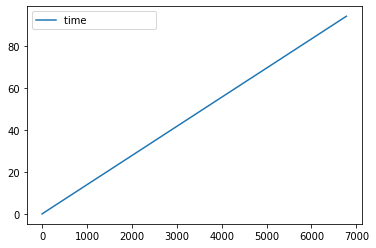

In [34]:
csv.plot()

In [36]:
csv[csv['od-sensors-2.od-720      '] != '                         ']['od-sensors-2.od-720      ']

6       0.6759                   
12      0.62126                  
18      0.62918                  
24      0.62126                  
30      0.62857                  
                  ...            
6758    1.18352                  
6764    1.18795                  
6770    1.18795                  
6776    1.18352                  
6778    1.18352                  
Name: od-sensors-2.od-720      , Length: 1130, dtype: object

In [32]:
60 * 0.166667

10.000020000000001

In [55]:
inputfile = open("../data/curvibacter_genomes/AEP_REFSEQ.faa","r")
outputfile = open("../data/curvibacter_genomes/AEP_accession.taxmap","w")
for line in inputfile.readlines():
    if ">" in line:
        outputfile.write(line.split(">")[1].split(" ")[0]+"\t"+str(1844971)+"\n")
inputfile.close()
#1888168
outputfile.close()

In [3]:
excel = pd.read_excel("../data/violin_plot_sonja/Cell size.xlsx")

In [4]:
excel.head()

,Casi,Unnamed: 1,Cell size,dh5a -,cell size,dh5a -.1,Unnamed: 6,cell size.1,dh5a +,cell size.2,...,Unnamed: 93,Cell size.2,6803 sfGFP -,Cell size.3,6803 sfGFP - (10ul in 15ml),Unnamed: 98,Cell size.4,6803 sfGFP +,cell size.22,6803 sfGFP + (10ul in 15ml)
0,NaN,NaN,0.69,0,0.69,0,NaN,0.69,0,NaN,...,NaN,0.69,235.0,0.69,0,NaN,0.69,998.0,0.69,0
1,NaN,NaN,0.70,21,0.70,451,NaN,0.70,20,NaN,...,NaN,0.72,475.0,0.70,69,NaN,0.72,2106.0,0.70,187
2,NaN,NaN,0.71,44,0.71,998,NaN,0.71,32,NaN,...,NaN,0.75,573.0,0.71,131,NaN,0.75,2170.0,0.71,397
3,NaN,NaN,0.72,54,0.72,1595,NaN,0.72,44,NaN,...,NaN,0.78,586.0,0.72,190,NaN,0.78,1864.0,0.72,607
4,NaN,NaN,0.73,56,0.73,1961,NaN,0.73,55,NaN,...,NaN,0.81,583.0,0.73,218,NaN,0.81,1519.0,0.73,768


In [161]:
subframelist = []
for header in excel.columns:
    if 'xcs' in header or 'Xcs' in header:
        subframelist.append(header)

In [162]:
subframe = excel[subframelist]

In [114]:
subframe = excel[['dh5a XcsA1 -','dh5a XcsA 1+']]

In [100]:
subframe = excel[['cell size.6','cell size.7']]

In [108]:
subframe = excel[['cell size.6','dh5a XcsA1 -','dh5a XcsA 1+','cell size.7']]

In [25]:
subframe = excel[['Cell size','dh5a -','cell size','dh5a -.1','cell size.1','dh5a +']]

In [66]:
subframe = excel[['Cell size','cell size','cell size.1']]

In [85]:
subframe = excel[['dh5a -','dh5a -.1','dh5a XcsA1 -','dh5a XcsA lv 1 -']]

In [ ]:
dh5a XcsA1 -
dh5a XcsA lv 1 -

In [70]:
subframe.head()

,Cell size,cell size,cell size.1
0,0.69,0.69,0.69
1,0.70,0.70,0.70
2,0.71,0.71,0.71
3,0.72,0.72,0.72
4,0.73,0.73,0.73


In [29]:
quartile1, medians, quartile3 = np.percentile(subframe, [25, 50, 75], axis=1)

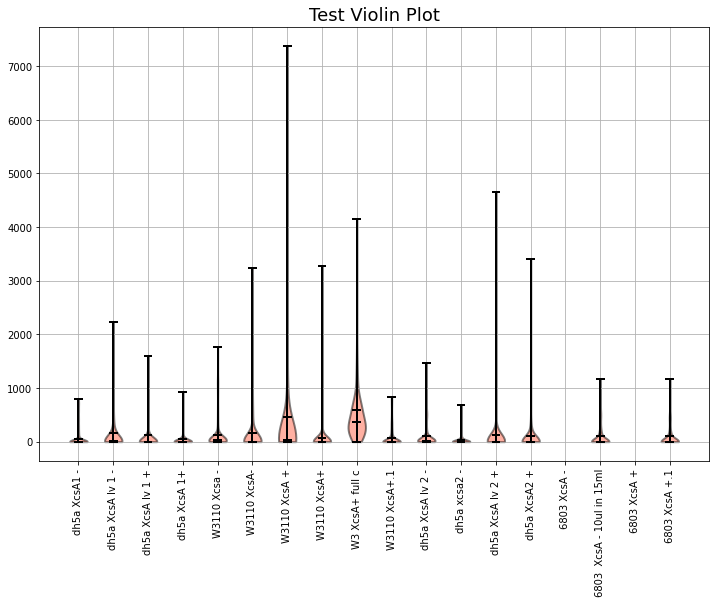

In [167]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
violinplots = ax.violinplot(subframe,showmeans=True, showmedians=True,
        showextrema=True)

for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violinplots[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(2)

for vp in violinplots['bodies']:
    vp.set_facecolor('tomato')
    vp.set_edgecolor('black')
    vp.set_linewidth(2)
    vp.set_alpha(0.5)

ax.set_xticks(range(1,len(subframelist)+1,1))
ax.set_xticklabels(subframelist,rotation=90)

#ax.set_xticklabels(['dh5a -','dh5a -','dh5a XcsA1 -','dh5a XcsA lv 1 -'])
ax.set_title("Test Violin Plot", fontsize=18)
#ax.set_ylim(0,200)
#ax.hlines(y=np.mean(subframe['dh5a XcsA1 -']),xmin=0.5,xmax=1.5,color='blue')
#ax.hlines(y=np.mean(subframe['dh5a XcsA 1+']),xmin=1.5,xmax=2.5,color='green')

#plt.axvline(2,ymin=1,ymax=2)
#ax.set_
plt.grid()
plt.show()

In [164]:
help(ax.set_xticklabels)

Help on method set_xticklabels in module matplotlib.axes._base:

set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the xaxis' labels with list of string labels.
    
    .. warning::
        This method should only be used after fixing the tick positions
        using `.Axes.set_xticks`. Otherwise, the labels may end up in
        unexpected positions.
    
    Parameters
    ----------
    labels : list of str
        The label texts.
    
    fontdict : dict, optional
        A dictionary controlling the appearance of the ticklabels.
        The default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    minor : bool, default: False
        Whether to set the minor ticklabels rather than the major ones.
    
    Returns
    -------
    l

In [111]:
x = range(len(subframe['cell size.6']))
y = list(subframe['cell size.6'])

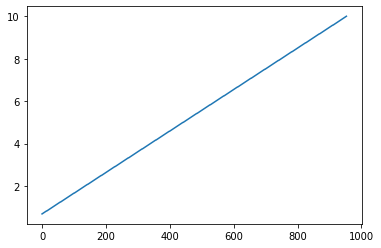

In [112]:
plt.plot(x,y)

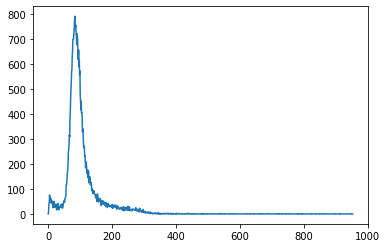

In [113]:
x = range(len(subframe['dh5a XcsA1 -']))
y = list(subframe['dh5a XcsA1 -'])
plt.plot(x,y)

In [105]:
np.mean(subframe['cell size.6'])

5.341844863731656

In [106]:
count_0 = 0
count_5 = 0
for i in subframe['cell size.6']:
    if i > 5:
        count_5 += 1
    else:
        count_0 += 1
        
print(count_0)
print(count_5)

443
511


/blast/miniconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


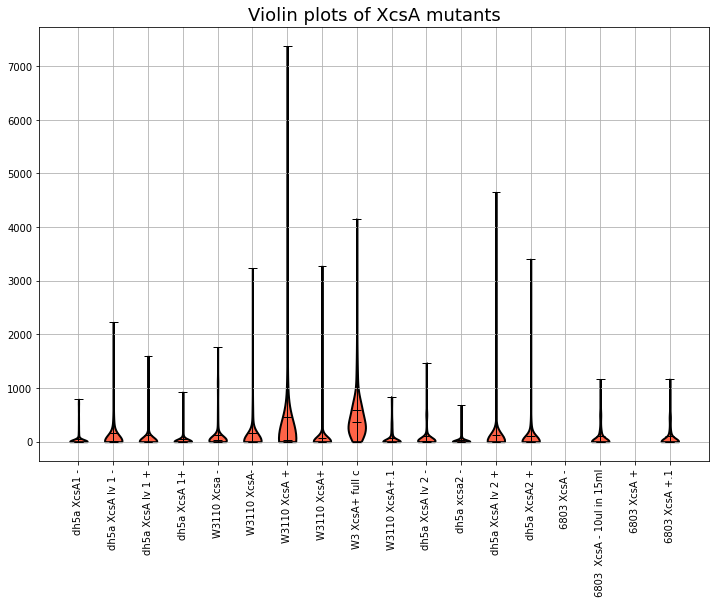

In [170]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
violinplots = ax.violinplot(subframe,showmeans=True, showmedians=True,
        showextrema=True)

for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violinplots[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

for vp in violinplots['bodies']:
    vp.set_facecolor('tomato')
    vp.set_edgecolor('black')
    vp.set_linewidth(2)
    vp.set_alpha(1)

ax.set_xticks(range(1,len(subframelist)+1,1))
ax.set_xticklabels(subframelist,rotation=90)

#ax.set_xticklabels(['dh5a -','dh5a -','dh5a XcsA1 -','dh5a XcsA lv 1 -'])
ax.set_title("Violin plots of XcsA mutants", fontsize=18)
#ax.set_ylim(0,200)
#ax.hlines(y=np.mean(subframe['dh5a XcsA1 -']),xmin=0.5,xmax=1.5,color='blue')
#ax.hlines(y=np.mean(subframe['dh5a XcsA 1+']),xmin=1.5,xmax=2.5,color='green')

#plt.axvline(2,ymin=1,ymax=2)
#ax.set_
plt.grid()
plt.savefig("../data/violin_plot_sonja/full_dataset_plots.png",dpi=400)
plt.show()

In [172]:

induced.head()

,W3110 XcsA +,W3110 XcsA+
0,0,0
1,547,703
2,1246,1532
3,2223,2217
4,3289,2824


In [182]:
df.head()

,0,1
0,0.0,0.0
1,625.0,154.0
2,1389.0,294.0
3,2220.0,483.0
4,3056.5,633.5


In [190]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.3.2
numpy==1.21.2


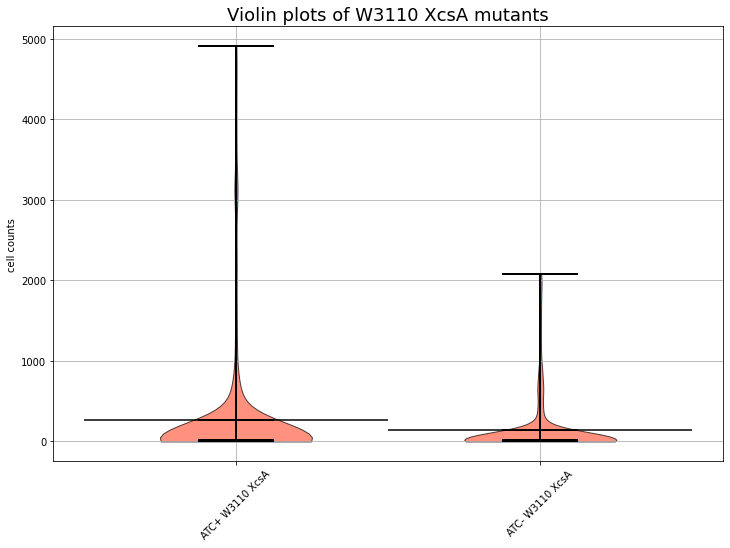

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

excel = pd.read_excel("../data/violin_plot_sonja/Cell size.xlsx")
subframelist = []
for header in excel.columns:
    if 'xcs' in header or 'Xcs' in header:
        subframelist.append(header)
        
induced = ['W3110 XcsA +','W3110 XcsA+']
induced = excel[induced]
not_induced = ['W3110 Xcsa -','W3110 XcsA-',]
not_induced = excel[not_induced]

ydata_induced = (induced['W3110 XcsA +'] + induced['W3110 XcsA+'])/2
ydata_not_induced = (not_induced['W3110 Xcsa -'] + not_induced['W3110 XcsA-'])/2

df = pd.DataFrame([ydata_induced,ydata_not_induced])
df = df.transpose()        
        
fig, ax = plt.subplots(1, 1, figsize = (12,8))
violinplots = ax.violinplot(df,showmeans=True, showmedians=True,
        showextrema=True)

for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violinplots[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(2)

for vp in violinplots['bodies']:
    vp.set_facecolor('tomato')
    vp.set_edgecolor('black')
    vp.set_linewidth(1)
    vp.set_alpha(0.7)

ax.set_xticks([1,2])
ax.set_xticklabels(['ATC+ W3110 XcsA','ATC- W3110 XcsA'],rotation=45)

#ax.set_xticklabels(['dh5a -','dh5a -','dh5a XcsA1 -','dh5a XcsA lv 1 -'])
ax.set_title("Violin plots of W3110 XcsA mutants", fontsize=18)
ax.set_ylabel('cell counts')
#ax.set_ylim(-10,1200)
ax.hlines(y=np.mean(df[0]),xmin=0.5,xmax=1.5,color='black',alpha=1)
ax.hlines(y=np.mean(df[1]),xmin=1.5,xmax=2.5,color='black',alpha=1)

#plt.axvline(2,ymin=1,ymax=2)
#ax.set_
plt.grid()
#plt.savefig("../data/violin_plot_sonja/induced_not_induced_plots.png",dpi=400)
plt.show()

In [192]:
df.head()

,0,1
0,0.0,0.0
1,625.0,154.0
2,1389.0,294.0
3,2220.0,483.0
4,3056.5,633.5


In [193]:
count = 0
for i in df[0]:
    if i < 200:
        count += 1
print(count)

796


In [194]:
len(df[0])

954

In [171]:
subframelist

['dh5a XcsA1 -',
 'dh5a XcsA lv 1 -',
 'dh5a XcsA lv 1 +',
 'dh5a XcsA 1+',
 'W3110 Xcsa -',
 'W3110 XcsA-',
 'W3110 XcsA +',
 'W3110 XcsA+',
 'W3 XcsA+ full c',
 'W3110 XcsA+.1',
 'dh5a XcsA lv 2 -',
 'dh5a xcsa2 -',
 'dh5a XcsA lv 2 +',
 'dh5a XcsA2 +',
 '6803 XcsA -',
 '6803  XcsA - 10ul in 15ml',
 '6803 XcsA +',
 '6803 XcsA +.1']

In [195]:
excel.head()

,Casi,Unnamed: 1,Cell size,dh5a -,cell size,dh5a -.1,Unnamed: 6,cell size.1,dh5a +,cell size.2,...,Unnamed: 93,Cell size.2,6803 sfGFP -,Cell size.3,6803 sfGFP - (10ul in 15ml),Unnamed: 98,Cell size.4,6803 sfGFP +,cell size.22,6803 sfGFP + (10ul in 15ml)
0,NaN,NaN,0.69,0,0.69,0,NaN,0.69,0,NaN,...,NaN,0.69,235.0,0.69,0,NaN,0.69,998.0,0.69,0
1,NaN,NaN,0.70,21,0.70,451,NaN,0.70,20,NaN,...,NaN,0.72,475.0,0.70,69,NaN,0.72,2106.0,0.70,187
2,NaN,NaN,0.71,44,0.71,998,NaN,0.71,32,NaN,...,NaN,0.75,573.0,0.71,131,NaN,0.75,2170.0,0.71,397
3,NaN,NaN,0.72,54,0.72,1595,NaN,0.72,44,NaN,...,NaN,0.78,586.0,0.72,190,NaN,0.78,1864.0,0.72,607
4,NaN,NaN,0.73,56,0.73,1961,NaN,0.73,55,NaN,...,NaN,0.81,583.0,0.73,218,NaN,0.81,1519.0,0.73,768


In [197]:
ydata_induced.head()

0       0.0
1     625.0
2    1389.0
3    2220.0
4    3056.5
dtype: float64

In [199]:
xdata = excel['cell size']

In [204]:
excel.columns

Index(['Casi', 'Unnamed: 1', 'Cell size', 'dh5a -', 'cell size', 'dh5a -.1',
       'Unnamed: 6', 'cell size.1', 'dh5a +', 'cell size.2',
       ...
       'Unnamed: 93', 'Cell size.2', '6803 sfGFP -', 'Cell size.3',
       '6803 sfGFP - (10ul in 15ml)', 'Unnamed: 98', 'Cell size.4',
       '6803 sfGFP +', 'cell size.22', '6803 sfGFP + (10ul in 15ml)'],
      dtype='object', length=103)

In [205]:
wildtype = (excel['dh5a -'] + excel['dh5a -.1'])/2

In [210]:
lv2 = (excel['dh5a XcsA lv 2 +'] + excel['dh5a XcsA2 +'])/2

In [212]:
gfp = (excel['W3110 GFP +'] + excel['W3110 GFP+'])/2

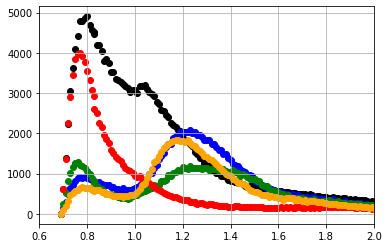

In [215]:
plt.scatter(x=xdata,y=ydata_induced,color="black")
plt.scatter(x=xdata,y=ydata_not_induced,color="blue")
plt.scatter(x=xdata,y=wildtype,color="green")
plt.scatter(x=xdata, y=lv2,color="red")
plt.scatter(x=xdata, y=gfp,color="orange")
plt.xlim(0.6,2)
plt.grid()

In [1]:
from bioinfokit.analys import gff